In [1]:
# prompt: Open the file "obesity_rates_adults.csv" as a dataframe located in my Drive
# https://www-statista-com.eu1.proxy.openathens.net/statistics/1017424/prevalence-of-childhood-obesity-in-france

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/These/data/obesity_rates_adults.csv')
print(df.head())
print(df.groupby('age_group')['obesity_rate'].describe())

Mounted at /content/drive
   year          age_group  obesity_rate
0  1997  18 - 24 years old           2.1
1  2000  18 - 24 years old           2.6
2  2003  18 - 24 years old           2.8
3  2006  18 - 24 years old           3.8
4  2009  18 - 24 years old           4.0
                   count       mean       std   min    25%   50%    75%   max
age_group                                                                    
18 - 24 years old    7.0   4.271429  2.433594   2.1   2.70   3.8   4.70   9.2
25 - 34 years old    7.0   9.200000  2.744692   5.5   7.60   8.7  10.60  13.8
35 - 44 years old    7.0  12.228571  3.270430   7.7   9.95  13.1  14.10  16.7
45 - 54 years old    7.0  14.714286  2.492274  10.7  13.50  14.9  16.00  18.4
55 - 64 years old    7.0  16.157143  3.050605  11.2  14.45  16.5  18.30  19.9
65 and older         7.0  17.314286  2.532080  13.2  15.60  18.3  19.35  19.8


In [2]:
# prompt: Insert in the existing df (do not mount anything), np.nan values for obesity_rate for all age_group (ie: 18 - 24 years old) for years 2017, 2015 and 2014.
# Then use the interpolate method from df with linear technique to replace nan values

import pandas as pd
import numpy as np
for year in [2014, 2015, 2017]:
  new_row = pd.DataFrame({'year': year, 'age_group': ["18 - 24 years old", "25 - 34 years old", "35 - 44 years old", "45 - 54 years old", "55 - 64 years old", "65 and older"], 'obesity_rate': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]})
  df = pd.concat([df, new_row], ignore_index=True)
df = df.sort_values(by=["age_group", "year"]).reset_index(drop=True)
# Interpolate the NaN values using linear interpolation
df["obesity_rate"] = df.groupby("age_group")["obesity_rate"].transform(lambda x: x.interpolate(method='polynomial', order=1))

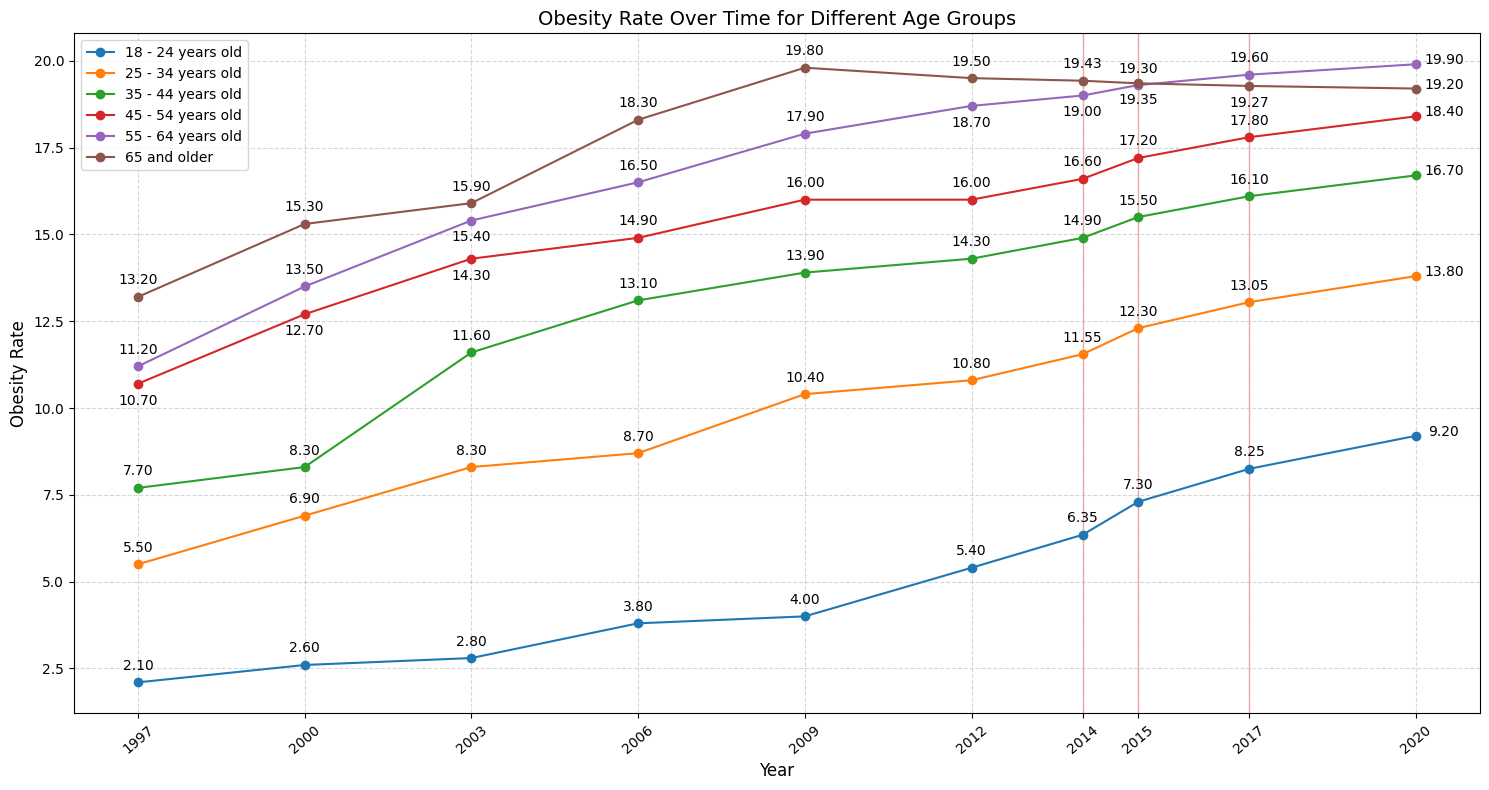

In [3]:
# prompt: Based on df, can you represent the obesity rate over year for each age group on different small graphs. make it as one graph include the year 2014, 2015 and 2017 as they are important. Represent on the graph a dot for each years we have and display the values. incline the labels on the x axis so they do not overlap

import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(15, 8))

# Iterate through each age group
for age_group in df['age_group'].unique():
    # Filter data for the current age group
    age_group_data = df[df['age_group'] == age_group]

    # Plot the data points
    plt.plot(age_group_data['year'], age_group_data['obesity_rate'], marker='o', label=age_group)

    # Annotate the data points with their values
    for index, row in age_group_data.iterrows():
        if row['year'] == 2020:
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(20,0), ha='center')
        elif (row['year'] in [2012, 2014, 2003] and row['age_group'] == '55 - 64 years old'):
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,-15), ha='center')
        elif (row['year'] in [1997, 2000, 2003] and row['age_group'] == '45 - 54 years old'):
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,-15), ha='center')
        elif (row['year'] in [2015, 2017] and row['age_group'] == '65 and older'):
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,-15), ha='center')
        else:
          plt.annotate(f"{row['obesity_rate']:.2f}", (row['year'], row['obesity_rate']), textcoords="offset points", xytext=(0,9), ha='center')

plt.axvspan(2014, 2014, color='red', alpha=0.35)
plt.axvspan(2015, 2015, color='red', alpha=0.35)
plt.axvspan(2017, 2017, color='red', alpha=0.35)

# Customize the plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Obesity Rate', fontsize=12)
plt.title('Obesity Rate Over Time for Different Age Groups', fontsize=14)
plt.xticks([1997, 2000, 2003, 2006, 2009, 2012, 2020, 2014, 2015, 2017], rotation=40)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

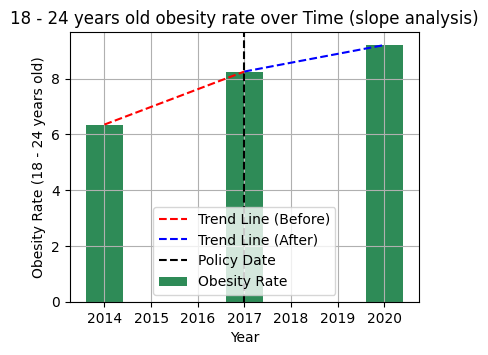

Slope before policy: 0.63
Slope after policy: 0.32


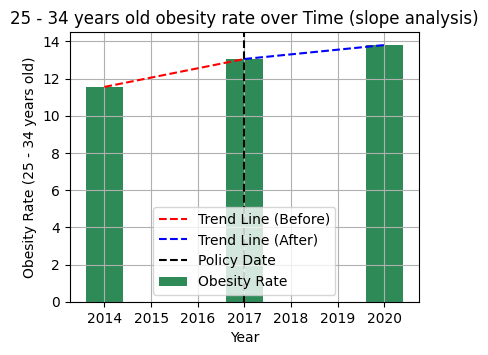

Slope before policy: 0.50
Slope after policy: 0.25


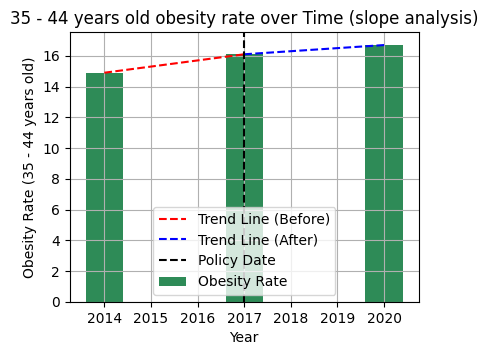

Slope before policy: 0.40
Slope after policy: 0.20


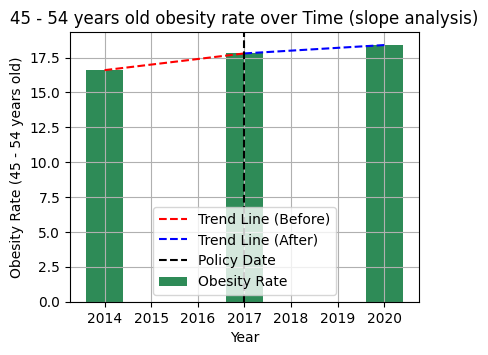

Slope before policy: 0.40
Slope after policy: 0.20


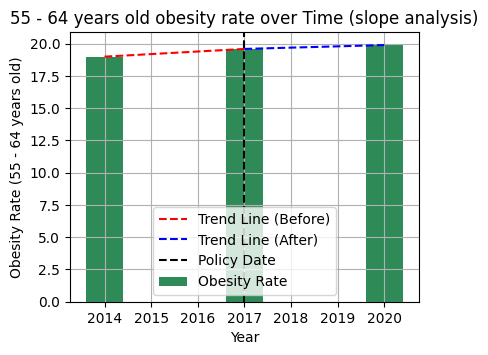

Slope before policy: 0.20
Slope after policy: 0.10


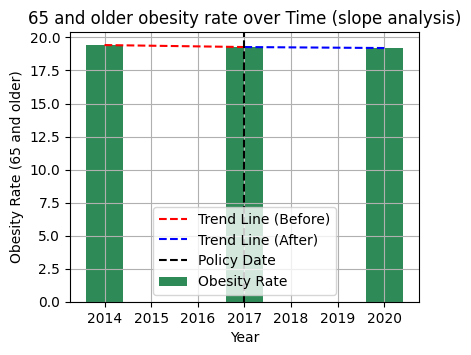

Slope before policy: -0.05
Slope after policy: -0.02


In [6]:
# prompt: Based on the dataframe that we have, do a slope analysis based on a policy in date of 2007 and analyze 3 years before and after it. Display results in a graph of your choice
import numpy as np

# Assuming df is already loaded as in the previous code
policy_date = 2017
years_before = 3
years_after = 3

for age_group in df['age_group'].unique():
  # Filter the data for the relevant period
  start_year = policy_date - years_before
  end_year = policy_date + years_after
  df_filtered = df[(df['age_group'] == age_group) & ((df['year'] == policy_date) | (df['year'] == policy_date - years_before) | (df['year'] == policy_date + years_after))]

  # Create a figure and an axes
  fig, ax = plt.subplots(figsize=(4.5, 3.5))

  # Plot the Obesity_Rate_Female over Year with a bar chart
  ax.bar(df_filtered['year'], df_filtered['obesity_rate'], color='seagreen', label='Obesity Rate')

  # Calculate and plot the linear regression line (slope) before the policy
  df_before = df_filtered[df_filtered['year'] <= policy_date]
  z_before = np.polyfit(df_before['year'], df_before['obesity_rate'], 1)
  p_before = np.poly1d(z_before)
  ax.plot(df_before['year'], p_before(df_before['year']), "r--", label='Trend Line (Before)')

  # Calculate and plot the linear regression line (slope) after the policy
  df_after = df_filtered[df_filtered['year'] >= policy_date]
  z_after = np.polyfit(df_after['year'], df_after['obesity_rate'], 1)
  p_after = np.poly1d(z_after)
  ax.plot(df_after['year'], p_after(df_after['year']), "b--", label='Trend Line (After)')

  # Add a vertical line to indicate the policy date
  ax.axvline(x=policy_date, color='black', linestyle='--', label='Policy Date')

  # Customize the plot
  ax.set_xlabel('Year')
  ax.set_ylabel(f'Obesity Rate ({age_group})')
  ax.set_title(f'{age_group} obesity rate over Time (slope analysis)')
  ax.legend()
  ax.grid(True)

  # Show the plot
  plt.show()

  # Print the slope values
  print(f"Slope before policy: {z_before[0]:.2f}")
  print(f"Slope after policy: {z_after[0]:.2f}")
